In [ ]:
# 1. Install libs (run once)
!pip install -q pandas numpy scikit-learn xgboost matplotlib seaborn scipy kneed joblib fairlearn aif360

# 2. Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, mean_absolute_error, r2_score
import joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 12.8 MB/s eta 0:00:00


(3900, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing values:
 Series([], dtype: int64)

Gender value counts:


,count
Gender,
Male,2652
Female,1248



Location value counts:


,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
New York,87
Nevada,87
Nebraska,87



Color value counts:


,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159



Size value counts:


,count
Size,
M,1755
L,1053
S,663
XL,429



Season value counts:


,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955



Frequency of Purchases value counts:


,count
Frequency of Purchases,
Every 3 Months,584
Annually,572
Quarterly,563
Monthly,553
Bi-Weekly,547
Fortnightly,542
Weekly,539


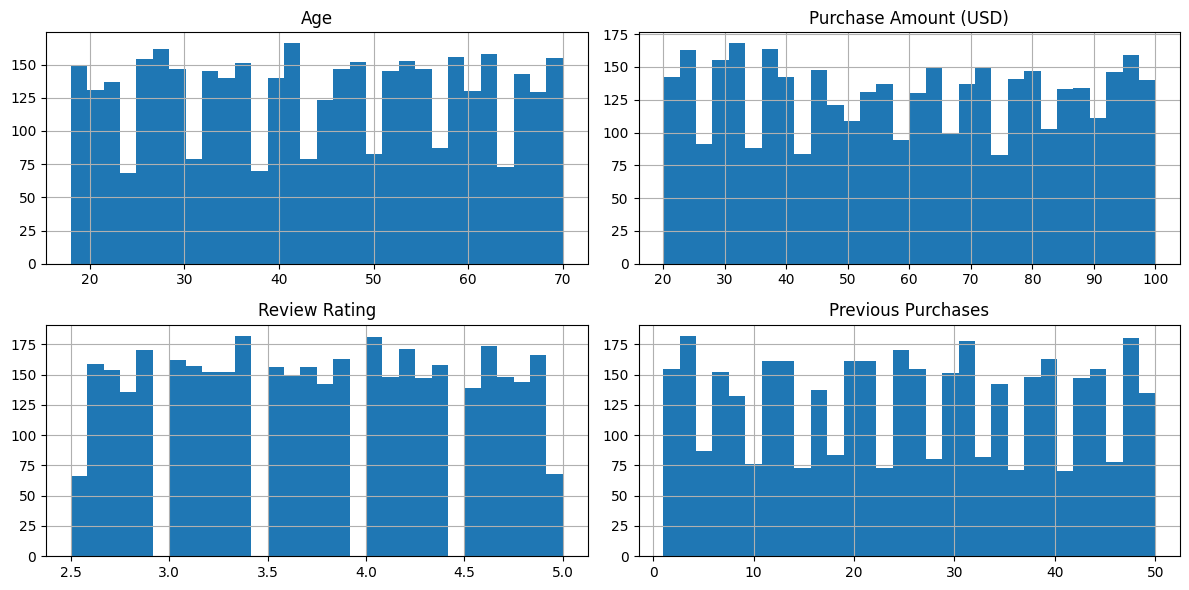

In [ ]:
# Info & basic stats
print(df.shape)
display(df.info())
display(df.describe(include='all').T)

# Missing values
mv = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", mv[mv>0])

# Value counts for key categorical columns
for col in ['Gender', 'Location', 'Color', 'Size', 'Season', 'Frequency of Purchases']:
    if col in df.columns:
        print(f"\n{col} value counts:")
        display(df[col].value_counts().head(20))

# Quick histograms
num_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
num_cols = [c for c in num_cols if c in df.columns]
df[num_cols].hist(bins=30, figsize=(12,6))
plt.tight_layout()


In [ ]:
# Example mapping - adapt to your data
gender_map = {'Male':1, 'Female':0}
size_map = {'S':0,'M':1,'L':2,'XL':3,'XXL':4}
season_map = {'Spring':0, 'Summer':1, 'Fall':2, 'Winter':3}
freq_map = {'Daily':0, 'Weekly':1, 'Fortnightly':2, 'Monthly':3, 'Quarterly':4, 'Annually':5}

if 'Gender' in df.columns:
    df['Gender_Code'] = df['Gender'].map(gender_map)
if 'Size' in df.columns:
    df['Size_Code'] = df['Size'].map(size_map)
if 'Season' in df.columns:
    df['Season_Code'] = df['Season'].map(season_map)
if 'Frequency of Purchases' in df.columns:
    df['Frequency_Code'] = df['Frequency of Purchases'].map(freq_map)

# Dynamic encoding of location (categorical)
if 'Location' in df.columns:
    df['Location_Code'] = df['Location'].astype('category').cat.codes

# Fill missing values sensibly
for col in ['Color_Code','Frequency_Code','Gender_Code']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Create CLV base (simple): avg purchase * frequency (you can refine by retention & margin)
if 'Purchase Amount (USD)' in df.columns and 'Frequency_Code' in df.columns:
    df['CLV_raw'] = df['Purchase Amount (USD)'] * (1/(df['Frequency_Code']+1))  # alternative formula; adjust


In [ ]:
# Using pandas.get_dummies for one-hot encoding nominal features
nominal_cols = ['Gender', 'Location', 'Color', 'Season', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Item Purchased', 'Category']

# Select only the columns that exist in the dataframe
nominal_cols_exist = [col for col in nominal_cols if col in df.columns]

if nominal_cols_exist:
    df_encoded = pd.get_dummies(df, columns=nominal_cols_exist, drop_first=True) # drop_first=True to avoid multicollinearity

# For ordinal features, you might still use mapping or OrdinalEncoder
# Example using mapping for Size and Frequency if order is important:
size_map = {'S':0,'M':1,'L':2,'XL':3} # Assuming these sizes exist and in this order
freq_map_ordered = {'Weekly':0, 'Bi-Weekly':1, 'Fortnightly':2, 'Monthly':3, 'Quarterly':4, 'Annually':5, 'Every 3 Months': 6} # Example order

if 'Size' in df_encoded.columns:
    df_encoded['Size_Code'] = df_encoded['Size'].map(size_map)
    df_encoded = df_encoded.drop('Size', axis=1) # Drop the original column

if 'Frequency of Purchases' in df_encoded.columns:
     # Check if the column is already in the encoded df or still in original df
    if 'Frequency of Purchases' in df_encoded.columns:
         df_encoded['Frequency_Code'] = df_encoded['Frequency of Purchases'].map(freq_map_ordered)
         df_encoded = df_encoded.drop('Frequency of Purchases', axis=1)
    elif 'Frequency of Purchases' in df.columns:
         df_encoded['Frequency_Code'] = df['Frequency of Purchases'].map(freq_map_ordered)


print("DataFrame after one-hot encoding and ordinal mapping:")
display(df_encoded.head())

DataFrame after one-hot encoding and ordinal mapping:


,Customer ID,Age,Purchase Amount (USD),Review Rating,Subscription Status,Previous Purchases,Gender_Code,Size_Code,Season_Code,Frequency_Code,...,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt,Category_Clothing,Category_Footwear,Category_Outerwear
0,1,55,53,3.1,Yes,14,1,2,3,2,...,False,False,False,False,False,False,False,True,False,False
1,2,19,64,3.1,Yes,2,1,2,3,2,...,False,False,False,False,False,True,False,True,False,False
2,3,50,73,3.1,Yes,23,1,0,0,0,...,False,False,False,False,False,False,False,True,False,False
3,4,21,90,3.5,Yes,49,1,1,0,0,...,False,False,False,False,False,False,False,False,True,False
4,5,45,49,2.7,Yes,31,1,1,0,5,...,False,False,False,False,False,False,False,True,False,False
